In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Face morphing

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
  alpha = x/100
  ret = cv2.addWeighted(img_0, alpha, img_1, 1-alpha,0)
  plt.axis('off')
  plt.imshow(ret[:,:,::-1])

colab_path = '/content/drive/My Drive/영상처리/'
fstr_0 = os.path.join(colab_path,'lee1.JPG')
fstr_1 = os.path.join(colab_path,'lee2.jpg')

img_0 = cv2.imread(fstr_0)
img_1 = cv2.imread(fstr_1)
img_0 = cv2.resize(img_0, dsize=(img_1.shape[1],img_1.shape[0]), interpolation= cv2.INTER_AREA)

interact(f, x=widgets.IntSlider(min=0, max=100, step=10, value=10, continuous_update=False));

interactive(children=(IntSlider(value=10, continuous_update=False, description='x', step=10), Output()), _dom_…

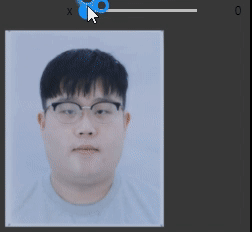

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

gifPath = "/content/drive/My Drive/영상처리/face morphing.gif" # please paste the whole path from Step 2-6
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

# Implementation for splitting, ROI masking, and segmentation.


In [6]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

## 이미지 불러오기

In [7]:
colab_path = '/content/drive/My Drive/영상처리/'
img_path = os.path.join(colab_path,'Lung-ROI-segmentation.png')
ori_img = cv2.imread(img_path)

## 이미지 확인
* 이미지의 shape을 확인함 -> 3채널의 컬러 영상을 확인

(0.0, 1.0, 0.0, 1.0)

(279, 850, 3)


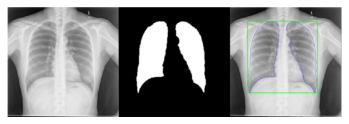

In [8]:
plt.axis('off')
plt.imshow(ori_img)
print(ori_img.shape)

* 원본 보호를 위해 copy()를 통해 복사하여 사용함.
* BGR의 컬러 영상을 GRAY 영상으로 변화하여 img_gray로 저장함.

In [9]:
img = ori_img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)

(279, 850)


## X-ray 영상과 mask 영상 추출

* Mask 영상의 특징은 원본 영상에서의 관심영역(ROI)을 255, 배경을 0으로 생성함.
* 이러한 특징을 사용하여 column의 값들을 조사하여 column의 값의 합이 0이 되는 부분을 조사함.
 - img는 [row, column]의 형태이기 때문에 column 값을 조사하기 위해 .T를 이용하여 행, 열을 바꿈
 - column의 처음 값은 약 150의 픽셀값으로 나타남으로 이를 제외한 두번째 값부터의 합을 이용하여 경계를 조사함.
 - 또한 정확한 mask 영상을 추출할 수 있도록 mask 영상 내의 노이즈를 제거함 -> 픽셀값이 50 이하인 경우, 0으로 설정
 - 0번째 column부터 탐색하여 처음으로 합이 0이 되는 부분에서 탐색을 중단하고, index_s에 저장함.
 - 마지막 column부터 거꾸로 탐색하여 합이 0이 되는 부분에서 탐색을 중단하고, index_e에 저장함.
* 처음과 마지막으로 합이 0이 되는 column의 index 값을 이용해 mask 영상을 추출함.
* X-ray 영상에서 mask 영상의 이미지 크기를 동일하게 설정하여 추출함.

In [10]:
img_t = img_gray.T
img_t[img_t<50]=0
for index_s, column in enumerate(img_t):
  if column[1:].sum()==0:
#    print(column)
    break

for i in range(len(img_t)-1,0,-1):
  colum = img_t[i]
  if colum[1:].sum()==0:
#    print(colum)
    index_e = i
    break

print('start : {}, end : {}'.format(index_s,index_e)) # 처음과 마지막 index 값

start : 284, end : 565


* 조사한 index 값을 이용하여 슬라이싱을 통해 X-ray, mask 영상을 생성함.

In [11]:
img = img_gray[:,:index_e-index_s]
mask = img_gray[:,index_s:index_e]

(279, 281) (279, 281)


<Figure size 432x288 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

<Figure size 432x288 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

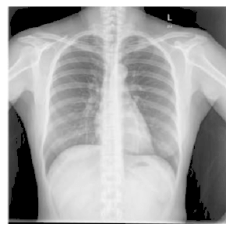

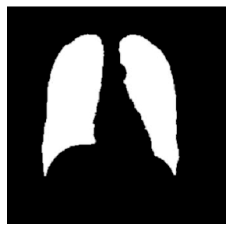

In [12]:
print(img.shape,mask.shape)
plt.figure()
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.figure()
plt.axis('off')
plt.imshow(mask,cmap='gray')

plt.show()

## ROI 영역만 추출한 영상 생성
* bitwise_and( )를 이용하여 mask 영상에서 255 값을 가지는 영역만 남기고 나머지 영역은 0으로 설정함.

<Figure size 432x288 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

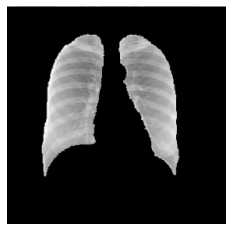

In [13]:
roi_img = cv2.bitwise_and(img,mask)

plt.figure()
plt.axis('off')
plt.imshow(roi_img,cmap=plt.cm.gray)
plt.show()